<a href="https://colab.research.google.com/github/KanzGiwa/Allstate-1A/blob/main/ALL_STATE_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALL STATE PROJECT(Predicting Auto Claims Severity)**allstate-insurance-1.svg

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/claims_data.csv")

In [ ]:
print(df.shape)
df.head(1000)

In [ ]:
nan_count = df.isnull().sum()

nan_count[nan_count > 0]

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df['loss'].describe()

In [ ]:
df.nunique()

Look for any garbage fields,

look at correlation between the features with the target

plot the features against the target

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['loss'], bins=50, kde=True)
plt.title('Distribution of Loss')
plt.show()


In [ ]:
continuous_features = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14']
correlation_matrix = df[continuous_features + ['loss']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Features and Loss')
plt.show()

# Task
Perform additional EDA and data preprocessing steps on the dataset.

## Categorical feature analysis

### Subtask:
Analyze the categorical features to understand their unique values and distributions.


**Reasoning**:
Identify and analyze the categorical features by printing the number of unique values and value counts for those with few unique values.



In [ ]:
categorical_features = df.select_dtypes(include='object').columns

print("Number of unique values for each categorical feature:")
for col in categorical_features:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count}")
    if unique_count < 50:
        print(f"Value counts for {col}:")
        print(df[col].value_counts())
        print("-" * 20)


**Reasoning**:
Visualize the distribution of some of the categorical features with a small number of unique values using count plots.



In [ ]:
categorical_features_to_plot = [col for col in categorical_features if df[col].nunique() < 10]

n_cols = 3
n_rows = (len(categorical_features_to_plot) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(categorical_features_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Categorical feature encoding

### Subtask:
Encode categorical features using appropriate techniques like one-hot encoding.


**Reasoning**:
Identify categorical columns and apply one-hot encoding, then concatenate with the original dataframe while dropping the original categorical columns.



In [4]:
categorical_cols = df.select_dtypes(include='object').columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,...,False,False,False,False,False,False,False,False,False,False
1,2,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,...,False,False,False,False,False,False,False,False,False,False
2,5,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,...,False,False,False,False,False,False,False,False,False,False
3,10,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,...,False,False,False,False,False,False,False,False,False,False
4,11,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,...,False,False,False,False,False,False,False,False,False,False


## Feature scaling

### Subtask:
Scale numerical features to ensure they have similar ranges.


**Reasoning**:
Identify the numerical features, excluding 'loss' and 'id', and then scale them using StandardScaler.



In [5]:
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('loss')
numerical_features.remove('id')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

display(df_encoded.head())

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,1,1.238750,-1.260936,-1.540471,1.409553,-0.848538,1.107908,-0.840070,-0.922092,1.023032,...,False,False,False,False,False,False,False,False,False,False
1,2,-0.870537,1.109451,0.463932,0.578923,1.906010,-0.253457,-0.271142,0.573972,-0.738944,...,False,False,False,False,False,False,False,False,False,False
2,5,-1.236521,-0.718477,-0.072846,-1.206334,-0.432284,-0.980633,-0.949428,-1.069556,-1.237183,...,False,False,False,False,False,False,False,False,False,False
3,10,-0.918075,0.234524,0.143849,-0.558452,-0.311730,-0.243577,-0.525875,-0.845049,-0.904033,...,False,False,False,False,False,False,False,False,False,False
4,11,-1.175963,-1.675658,0.143849,-0.088079,1.037383,-1.523596,-1.331256,-1.207792,-1.456660,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Fill missing values in continuous features with their mean
df['cont1'].fillna(df['cont1'].mean(), inplace=True)
df['cont2'].fillna(df['cont2'].mean(), inplace=True)

# Now, your feature engineering code will work

/tmp/ipython-input-3985783650.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cont1'].fillna(df['cont1'].mean(), inplace=True)
/tmp/ipython-input-3985783650.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [7]:
df.dropna(subset=['cont1', 'cont2'], inplace=True)


## Feature engineering

### Subtask:
Explore potential feature engineering steps to create new features that might improve the model's performance.


**Reasoning**:
Implement one or two promising feature engineering steps and add them to the df_encoded DataFrame. Display the head of the updated df_encoded DataFrame to inspect the newly created features.



In [8]:
#Example feature engineering: Create polynomial features for some continuous variables
#choose 'cont1' and 'cont2' and create a second-degree polynomial
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['cont1', 'cont2']])

#Create a DataFrame for the new polynomial features
poly_feature_names = poly.get_feature_names_out(['cont1', 'cont2'])
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)

#Drop the original 'cont1' and 'cont2' from the polynomial features dataframe to avoid redundancy after merging
df_poly = df_poly.drop(columns=['cont1', 'cont2'], errors='ignore')


#Example feature engineering: Create interaction features for some categorical variables
#choose 'cat1' and 'cat2'
#Convert boolean columns back to 0 and 1 for multiplication
df_encoded['cat1_B_int'] = df_encoded['cat1_B'].astype(int)
df_encoded['cat2_B_int'] = df_encoded['cat2_B'].astype(int)
df_encoded['cat1_cat2_interaction'] = df_encoded['cat1_B_int'] * df_encoded['cat2_B_int']

#Drop the intermediate integer columns
df_encoded = df_encoded.drop(columns=['cat1_B_int', 'cat2_B_int'])


#Merge the new features into df_encoded
#Ensure the indices align before merging
df_encoded = pd.concat([df_encoded, df_poly], axis=1)


#Display the head of the updated DataFrame
display(df_encoded.head())

/tmp/ipython-input-1660386031.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded['cat1_B_int'] = df_encoded['cat1_B'].astype(int)
/tmp/ipython-input-1660386031.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded['cat2_B_int'] = df_encoded['cat2_B'].astype(int)
/tmp/ipython-input-1660386031.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y,cat1_cat2_interaction,cont1^2,cont1 cont2,cont2^2
0,1,1.238750,-1.260936,-1.540471,1.409553,-0.848538,1.107908,-0.840070,-0.922092,1.023032,...,False,False,False,False,False,False,0,0.527512,0.178612,0.060477
1,2,-0.870537,1.109451,0.463932,0.578923,1.906010,-0.253457,-0.271142,0.573972,-0.738944,...,False,False,False,False,False,False,0,0.109240,0.243611,0.543269
2,5,-1.236521,-0.718477,-0.072846,-1.206334,-0.432284,-0.980633,-0.949428,-1.069556,-1.237183,...,False,False,False,False,False,False,0,0.068561,0.093823,0.128393
3,10,-0.918075,0.234524,0.143849,-0.558452,-0.311730,-0.243577,-0.525875,-0.845049,-0.904033,...,False,False,False,False,False,False,1,0.103423,0.178736,0.308894
4,11,-1.175963,-1.675658,0.143849,-0.088079,1.037383,-1.523596,-1.331256,-1.207792,-1.456660,...,False,False,False,False,False,False,0,0.074640,0.043710,0.025597


## Summary:

### Data Analysis Key Findings

*   A large number of categorical features have a small number of unique values, primarily two ('A' and 'B'), while a few have a much larger number (up to 326).
*   One-hot encoding was successfully applied to the categorical features, resulting in a significant increase in the number of columns in the dataset.
*   Numerical features (excluding 'loss' and 'id') were successfully scaled using `StandardScaler`, resulting in values centered around zero with a standard deviation of one.
*   New features were engineered by creating second-degree polynomial terms for 'cont1' and 'cont2' and an interaction term between 'cat1\_B' and 'cat2\_B', which were then added to the dataset.

### Insights or Next Steps

*   Consider investigating the categorical features with a large number of unique values further to determine if alternative encoding methods (e.g., target encoding, frequency encoding) would be more appropriate.
*   Evaluate the impact of the engineered polynomial and interaction features on model performance in subsequent modeling steps.


# **We can Now start MODELING
**

In [9]:
#going to remove the rows were 'loss' is NaN
df_encoded.dropna(subset=['loss'], inplace=True)


In [10]:
#defining the fetures x and y where x contains all the columns except for 'id' and 'loss'
X = df_encoded.drop(columns=['id', 'loss'])

#y contains only the 'loss' column
y = df_encoded['loss']


#remove dups
X =  X.loc[:,~X.columns.duplicated()]

In [11]:
from sklearn.model_selection import train_test_split

#going to split the data into traning set with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) #NOTE THAT WE CAN CHANGE THE SPLIT

In [ ]:
#-- dont use n_estimators in here
param_grid_xbg = {
    #'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 5, 10]
    #-- use sub_sample and colsample_bytree; makes model less likely to overfit (sub_sample), other doesnt use all the data
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

#-- try early stopping, do 3 splits, take training and split it again, try 60/20/20, use 20% for early stopping to help determine when to stop training the model, feed it validation
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=123) #include n_estimators, set to 1000

random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xbg,
                                    scoring='neg_mean_absolute_error', cv=3, n_jobs=-1, verbose=2)

random_search_xgb.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best parameters for XGBoost:", random_search_xgb.best_params_)

# Use the best model from the random search for prediction and evaluation
best_xgb_model = random_search_xgb.best_estimator_

y_pred = best_xgb_model.predict(X_test)

#xgb_model.fit(X_train, y_train)
print("training is complete")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#calculste and print the metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("Mean Absolute Error (MAE):", mae)#will show the model is wrong by this much $$$$
print("Root Mean Squared Error (RMSE):", rmse) #this will show the error size if RMSE > MAE the model is very very wrong


# Going to try new stuff This is experimental with XGBOOST



In [ ]:
tuned_model = xgb.XGBRegressor(
    objective='reg:squarederror',

    n_estimators=500,#Increased from 100
    learning_rate=0.05,#Decreased from 0.3
    max_depth=5,#A reasonable starting depth
    random_state=123
)

tuned_model.fit(X_train, y_train)

y_pred_tuned = tuned_model.predict(X_test)


mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))


print("Original MAE:" , mae)

print("Tuned MAE:", mae_tuned)


print("Original RMSE:", rmse)
print("Tuned RMSE:", rmse_tuned)

# I started with XGB becauseof high accuracy and it also learns from mistake. It prevents overfitting . The first time i ran this model the MAE was off by $1,262  meaning the model predection was off by that amount. After tuning the MAE dropped by  $$40  which is not a lot but still something. Next step is to test next model and pick the best one.


## LightGBM Model


# Task
Tune the hyperparameters for the LightGBM model and evaluate its performance.

## Define a hyperparameter grid

### Subtask:
Define a dictionary with different hyperparameter values to explore for the LightGBM model.


**Reasoning**:
Define the hyperparameter grid for the LightGBM model tuning.



In [ ]:
#parameter grid for LGB random search

#-- also implement early stopping, don't use n_estimators in here
param_grid_lgb = {
    #'n_estimators': [200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb


#initialize random search for LGB

#-- use n_estimators in here, use a large amount about 1000
lgb_model = lgb.LGBMRegressor(random_state=123, n_estimators = 1000)

random_search_lgb = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid_lgb,
                           scoring='neg_mean_absolute_error', cv=3, n_jobs=-1, verbose=2)

#fit random search model
random_search_lgb.fit(X_train, y_train)

In [ ]:
#parameters for lgb model

#-- dont use n_estimators here, implement early stopping
params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 100,
    'learning_rate': 0.05,
    'max_depth': 10,
    #'n_estimators': 1000,
    'random_state': 123 # Added random_state for reproducibility
}

# Pass parameters as keyword arguments and train
lgb_model = lgb.LGBMRegressor(**params)
lgb_model.fit(X_train, y_train)

#get predictions
y_pred_lgb = lgb_model.predict(X_test)

#evaluate performance with MAE and RMSE
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print(f"LightGBM MAE: {mae_lgb}")
print(f"LightGBM RMSE: {rmse_lgb}")

In [ ]:
import matplotlib.pyplot as plt

# Visualize LGB evaluation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("Actual vs. Predicted Loss (LightGBM)")
plt.grid(True)
# Add a line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## Lasso Regression Models

### Subtask:
Train and evaluate Lasso and Ridge regression models.

**Reasoning**:
Import the necessary libraries for Lasso regression, initialize the models, train them on the training data, make predictions on the test data, and evaluate their performance using MAE and RMSE.

In [19]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=1.0, random_state=123) # You can tune the alpha parameter

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Make predictions with Lasso
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Lasso Regression MAE: {mae_lasso}")
print(f"Lasso Regression RMSE: {rmse_lasso}")

Lasso Regression MAE: 1303.7079991665596
Lasso Regression RMSE: 2023.0196819383968


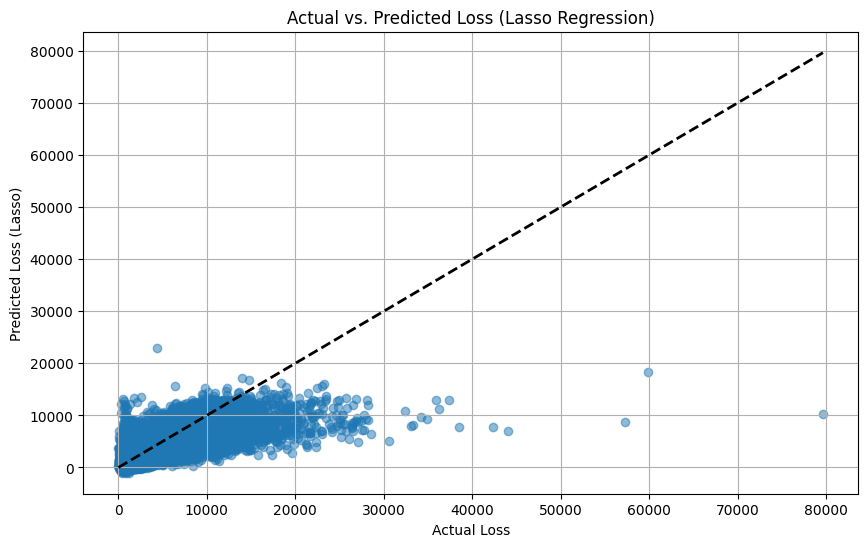

In [20]:
import matplotlib.pyplot as plt

# Visualize Lasso evaluation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss (Lasso)")
plt.title("Actual vs. Predicted Loss (Lasso Regression)")
plt.grid(True)
# Add a line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()